<a href="https://colab.research.google.com/github/AlwaysEden/Temperature-Forecast/blob/main/Prophet_with_exogenous_variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os.path import split
import requests
import json
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import pandas as pd
from zoneinfo import ZoneInfo
from re import X
import numpy as np

from scipy.ndimage import gaussian_filter1d
from prophet import Prophet
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
def weatherPastData(loc):  #기상청API에서 온도 데이터를 받아 파싱
  now = datetime.now(ZoneInfo('Asia/Seoul'))
  one_month_ago = now - timedelta(days=30)

  startDt = one_month_ago.strftime("%Y%m%d%H00")
  endDt = now.strftime("%Y%m%d%H00")
  #startDt = '202311151300'
  #endDt = '202312151300'
  print(startDt)
  print(endDt)

  # URL 문자열, stn=138(포항) 자세한 사항 기상3청 참고
  url = 'https://apihub.kma.go.kr/api/typ01/url/kma_sfctm5.php?tm1={startDt}&tm2={endDt}&obs=TA&stn={loc}&help=0&authKey=[APIKEY]'.format(startDt=startDt, endDt=endDt, loc=loc)

  # GET 요청
  response = requests.get(url)

  splited_response = response.text.splitlines()
  result_lines = splited_response[3:len(splited_response) - 1]

  temperature_list = []
  for line in result_lines:
    line = line.split(',')
    temperature_list.append(float(line[5]))

  # 예제 시계열 데이터 생성
  date_rng = pd.date_range(start=startDt, end=endDt, freq='h')
  df = pd.DataFrame({'ds': date_rng, 'y': temperature_list})

  return df

In [ ]:
#데이터 다운로드

weatherData = weatherPastData(138) #138 포항
factoryData = weatherPastData(184) #184 제주도

factoryData['y'] = factoryData['y'] + 5
factoryData['y'] = gaussian_filter1d(factoryData['y'], sigma=4) #제주도 데이터를 공장 현장데이터로 사용하려고하다보니 완만한 변화율이 필요했음.
factoryData['external_param'] = weatherData['y']

steps = 24 # 예측하고자하는 시간
factory_trainingData = factoryData.iloc[:(len(factoryData)-steps)]
factory_testData = factoryData.iloc[(len(factoryData)-steps):]

202412100900
202501090900
202412100900
202501090900


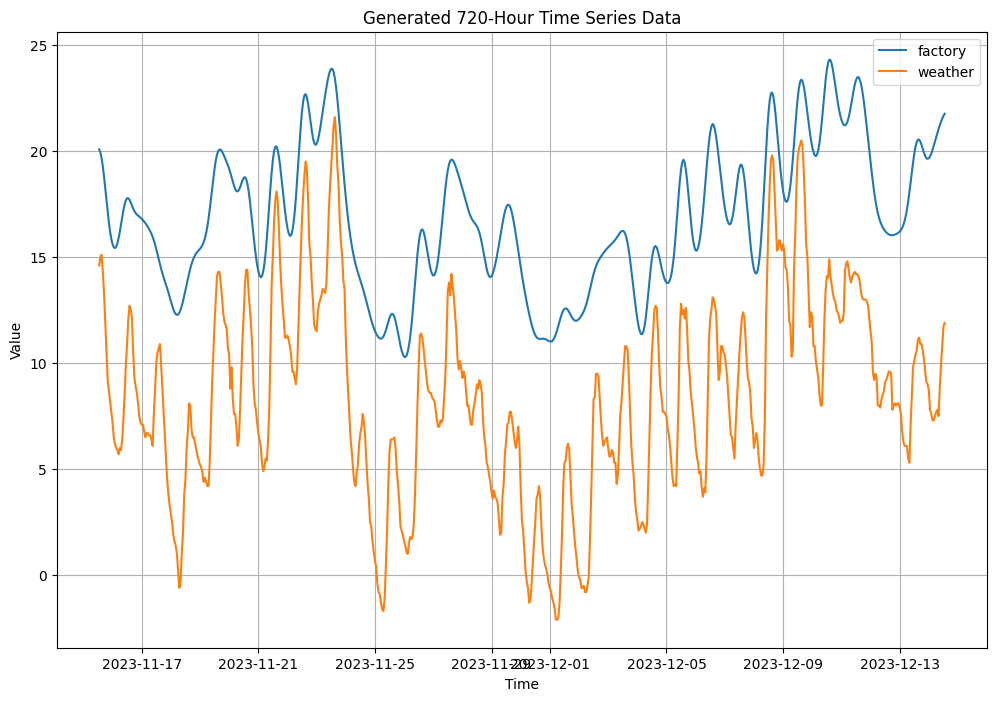

In [ ]:
#생성된 데이터 시각화
plt.figure(figsize=(12, 8))
plt.plot(factory_trainingData['ds'], factory_trainingData['y'], label="factory",)
plt.plot(factory_trainingData['ds'], factory_trainingData['external_param'], label="weather")
plt.title("Generated 720-Hour Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.legend()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/lrr7eddx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/zn2paroe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98732', 'data', 'file=/tmp/tmpxxzlanu3/lrr7eddx.json', 'init=/tmp/tmpxxzlanu3/zn2paroe.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_model7mk7o2ty/prophet_model-20250109005727.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

721


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


721


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/4ne6f2r3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/lx96935c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46362', 'data', 'file=/tmp/tmpxxzlanu3/4ne6f2r3.json', 'init=/tmp/tmpxxzlanu3/lx96935c.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelqygln6pt/prophet_model-20250109005729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version

721


DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/kuo5udxa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/cu55tr6u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=3597', 'data', 'file=/tmp/tmpxxzlanu3/kuo5udxa.json', 'init=/tmp/tmpxxzlanu3/cu55tr6u.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_model1ws7xg5r/prophet_model-20250109005730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run proph

721


DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50992', 'data', 'file=/tmp/tmpxxzlanu3/bun6fc4h.json', 'init=/tmp/tmpxxzlanu3/tl8ic524.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelace7iyt0/prophet_model-20250109005731.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


721


DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/lj7an6s8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/3f_eowtz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90195', 'data', 'file=/tmp/tmpxxzlanu3/lj7an6s8.json', 'init=/tmp/tmpxxzlanu3/3f_eowtz.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelyasguxj1/prophet_model-20250109005733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prop

721


00:57:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/xa2o2so1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/gooriy7y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=92481', 'data', 'file=/tmp/tmpxxzlanu3/xa2o2so1.json', 'init=/tmp/tmpxxzlanu3/gooriy7y.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelw1rz38ut/prophet_model-20250109005735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:35 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/nzald2lg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/u7zl4yip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98833', 'data', 'file=/tmp/tmpxxzlanu3/nzald2lg.json', 'init=/tmp/tmpxxzlanu3/u7zl4yip.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_model53lyf2pr/prophet_model-20250109005736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:36 - cmdstanpy - INFO - Chain [1] start pr

721


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/_gza145n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/o8naygfw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12431', 'data', 'file=/tmp/tmpxxzlanu3/_gza145n.json', 'init=/tmp/tmpxxzlanu3/o8naygfw.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelmvc0kzdb/prophet_model-20250109005736.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


721


00:57:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/3qxufn2l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/8t46qmov.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79128', 'data', 'file=/tmp/tmpxxzlanu3/3qxufn2l.json', 'init=/tmp/tmpxxzlanu3/8t46qmov.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modeln7z28dvq/prophet_model-20250109005737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:37 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/1l2kqiit.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/5pspgobc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53679', 'data', 'file=/tmp/tmpxxzlanu3/1l2kqiit.json', 'init=/tmp/tmpxxzlanu3/5pspgobc.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modela_f9g327/prophet_model-20250109005737.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:37 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/3684hyx5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/o_pv8jby.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85402', 'data', 'file=/tmp/tmpxxzlanu3/3684hyx5.json', 'init=/tmp/tmpxxzlanu3/o_pv8jby.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_model9in2o9iu/prophet_model-20250109005738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:38 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/c4530p68.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/_xzxuc3f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37662', 'data', 'file=/tmp/tmpxxzlanu3/c4530p68.json', 'init=/tmp/tmpxxzlanu3/_xzxuc3f.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelpc9w9dso/prophet_model-20250109005738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:38 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/defz52fa.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/798z0wm_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87216', 'data', 'file=/tmp/tmpxxzlanu3/defz52fa.json', 'init=/tmp/tmpxxzlanu3/798z0wm_.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modeld1p7dava/prophet_model-20250109005739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:39 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/2s6zfijl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/5pwo4e_u.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71939', 'data', 'file=/tmp/tmpxxzlanu3/2s6zfijl.json', 'init=/tmp/tmpxxzlanu3/5pwo4e_u.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelxkob0s9_/prophet_model-20250109005739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:39 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/ue19ryhz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/7xem3tzm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62128', 'data', 'file=/tmp/tmpxxzlanu3/ue19ryhz.json', 'init=/tmp/tmpxxzlanu3/7xem3tzm.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_model3dsdolwg/prophet_model-20250109005740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:40 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/h6ozgxh5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/3tday6gg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18040', 'data', 'file=/tmp/tmpxxzlanu3/h6ozgxh5.json', 'init=/tmp/tmpxxzlanu3/3tday6gg.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modeldf6i5q0g/prophet_model-20250109005740.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:40 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/2hrd9irq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/9ydlks8c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44162', 'data', 'file=/tmp/tmpxxzlanu3/2hrd9irq.json', 'init=/tmp/tmpxxzlanu3/9ydlks8c.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelb1v4_kuj/prophet_model-20250109005741.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:41 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/r6x48vw8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/7nbuj6l1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43451', 'data', 'file=/tmp/tmpxxzlanu3/r6x48vw8.json', 'init=/tmp/tmpxxzlanu3/7nbuj6l1.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelags8joho/prophet_model-20250109005743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:43 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/a35655me.json


721


DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/gpli6w5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91487', 'data', 'file=/tmp/tmpxxzlanu3/a35655me.json', 'init=/tmp/tmpxxzlanu3/gpli6w5h.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelzcixp3_9/prophet_model-20250109005744.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:57:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdsta

721


00:57:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/9ojo1dxj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/onicyn4f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55132', 'data', 'file=/tmp/tmpxxzlanu3/9ojo1dxj.json', 'init=/tmp/tmpxxzlanu3/onicyn4f.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_model2n644a1f/prophet_model-20250109005748.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:48 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/5bqahon0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/qwgpvhg8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71816', 'data', 'file=/tmp/tmpxxzlanu3/5bqahon0.json', 'init=/tmp/tmpxxzlanu3/qwgpvhg8.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_model5q87c7s5/prophet_model-20250109005749.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:49 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/of45x9h2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/5y9p5k88.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59694', 'data', 'file=/tmp/tmpxxzlanu3/of45x9h2.json', 'init=/tmp/tmpxxzlanu3/5y9p5k88.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelwd5ewdv_/prophet_model-20250109005750.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:50 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/why38dfm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/a9nt35ni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98547', 'data', 'file=/tmp/tmpxxzlanu3/why38dfm.json', 'init=/tmp/tmpxxzlanu3/a9nt35ni.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelbg4f7py1/prophet_model-20250109005753.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:53 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/y4h5y05q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/abb01fof.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59518', 'data', 'file=/tmp/tmpxxzlanu3/y4h5y05q.json', 'init=/tmp/tmpxxzlanu3/abb01fof.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_models61refm0/prophet_model-20250109005756.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:56 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/mf05ct_h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/wycnwepc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50873', 'data', 'file=/tmp/tmpxxzlanu3/mf05ct_h.json', 'init=/tmp/tmpxxzlanu3/wycnwepc.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelipjnue1x/prophet_model-20250109005758.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:58 - cmdstanpy - INFO - Chain [1] start pr

721


00:57:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/0rxi9jj8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/co7ywas4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96249', 'data', 'file=/tmp/tmpxxzlanu3/0rxi9jj8.json', 'init=/tmp/tmpxxzlanu3/co7ywas4.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_modelpq293_y_/prophet_model-20250109005759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:57:59 - cmdstanpy - INFO - Chain [1] start pr

721


00:58:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/75khjkkd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxxzlanu3/kn52n5md.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11613', 'data', 'file=/tmp/tmpxxzlanu3/75khjkkd.json', 'init=/tmp/tmpxxzlanu3/kn52n5md.json', 'output', 'file=/tmp/tmpxxzlanu3/prophet_model4im2lm3j/prophet_model-20250109005801.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:58:01 - cmdstanpy - INFO - Chain [1] start pr

721


00:58:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


721
{'changepoint_prior_scale': 1, 'n_changepoints': 30, 'seasonality_prior_scale': 0.5}


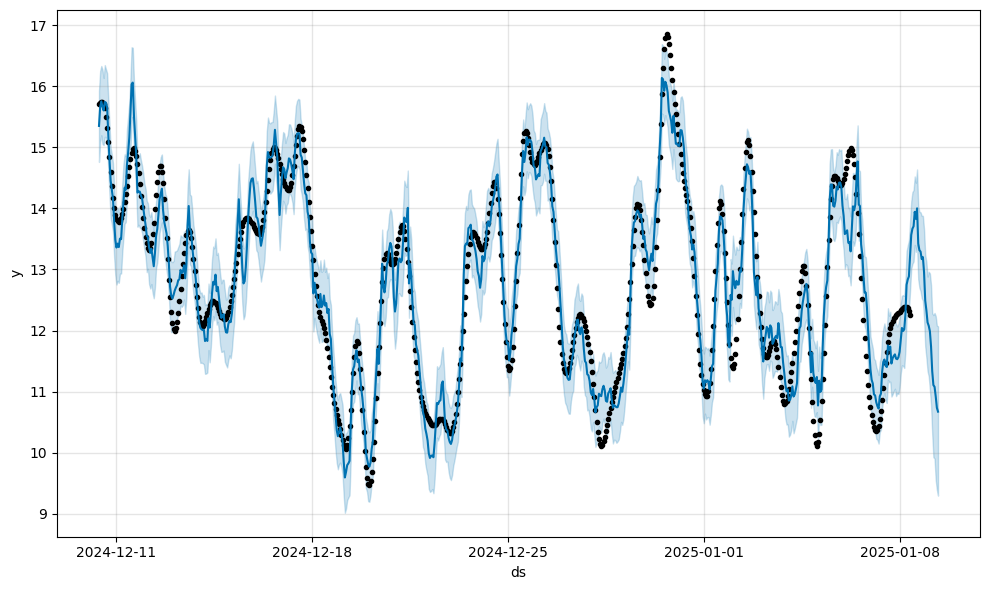

In [ ]:
#Prophet Model
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.5, 1],
    'seasonality_prior_scale': [0.001, 0.005, 0.01, 0.1, 0.5, 1],
    'n_changepoints': [30]
}

best_mae = float('inf')
best_params = None
best_forecast = None

for params in ParameterGrid(param_grid):
    model = Prophet(
        n_changepoints=params['n_changepoints'],
        changepoint_prior_scale=params['changepoint_prior_scale'],
        seasonality_prior_scale=params['seasonality_prior_scale'],
    )
    model.add_regressor('external_param')
    model.fit(factory_trainingData)

    future = model.make_future_dataframe(periods=steps, freq='H')
    future['external_param'] = factoryData['external_param']
    forecast = model.predict(future)
    print(len(forecast))

    mae = mean_absolute_error(factory_trainingData['y'], forecast['yhat'][:len(factory_trainingData)]) #과거 데이터로 훈련을 하고 과거 데이터를 예측했을 때 예측 오차가 가장 적은 모델 선택 위함.
    if mae < best_mae:
      best_params = params
      best_mae = mae
      best_forecast = forecast

# 결과 시각화
print(best_params)
fig = model.plot(best_forecast)

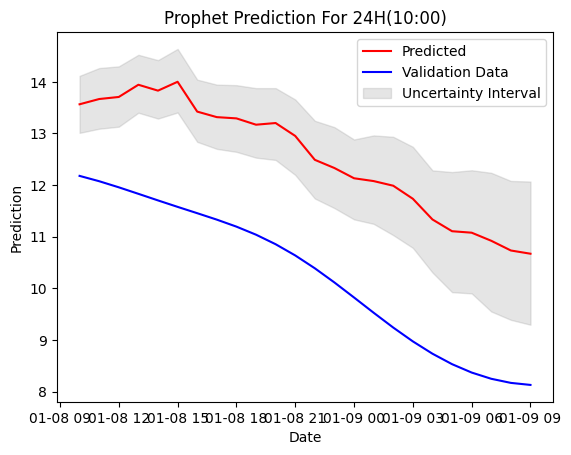

MAE(Mean Absolute Error) = 2.273596702006421
MSE(Mean Square Error) = 5.29863751944641


In [ ]:
import matplotlib.pyplot as plt

forecast_filtered = best_forecast[best_forecast['ds'] > factory_trainingData['ds'].max()]

# 학습 데이터 제외한 시각화
plt.plot(forecast_filtered['ds'], forecast_filtered['yhat'], label='Predicted', color='red')
plt.plot(factory_testData['ds'][:steps], factory_testData['y'][:steps], label='Validation Data', color='blue')
plt.fill_between(
    forecast_filtered['ds'],
    forecast_filtered['yhat_lower'],
    forecast_filtered['yhat_upper'],
    color='gray', alpha=0.2, label='Uncertainty Interval'
)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Prediction')
plt.title('Prophet Prediction For 24H(10:00)')
plt.show()

mae = mean_absolute_error(factory_testData['y'], best_forecast['yhat'][-steps:])
mse = mean_squared_error(factory_testData['y'], best_forecast['yhat'][-steps:])
print(f"MAE(Mean Absolute Error) = {mae}") # 예측 오차
print(f"MSE(Mean Square Error) = {mse}") # 오차민감도